輸入立委臉書粉專內容及選舉政見資料

In [41]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019_research_right.csv')
politics = pd.read_csv('9th_legislator_promise.csv')
fb.page_name.unique() #觀察人名在資料集中叫什麼名字
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

吳秉叡為例，建立發文文字斷詞表

---



In [42]:
wu = fb[fb.page_name == "吳秉叡"]
wu.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
26375,154631861234059_2254345517929339,154631861234059,吳秉叡,政治人物,1/17(四)到1/20(日)上午，大秉將於新莊各大市場向各位拜年並贈送春聯，喜歡可愛的【金豬春聯】朋友歡迎來索取哦~\n\n大秉祝大家豬事如意、豬年行大運!!\n\n🐷【拜年發春聯行程】\n\n⏩1/18 (五) 09:00 新莊裕民市場\n⏩1/19 (六) 09:30 新莊四維市場\n⏩1/20 (日) 09:30 新莊宏泰市場\n\n#金豬春聯,NaN,photo,https://www.facebook.com/154631861234059/posts/2254345517929339/,2019-01-15T08:02:58+0000,2019-01-15T16:02:58,...,NaN,NaN,996,0,0,0,0,0,17,18


In [43]:
wu['new_date'] = pd.to_datetime(wu['created_time_taipei']).dt.date
wu['month_year'] = pd.to_datetime(wu['new_date']).dt.to_period('M')
wu.head(1)

<ipython-input-43-ce416ef0ba4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wu['new_date'] = pd.to_datetime(wu['created_time_taipei']).dt.date
<ipython-input-43-ce416ef0ba4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wu['month_year'] = pd.to_datetime(wu['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26375,154631861234059_2254345517929339,154631861234059,吳秉叡,政治人物,1/17(四)到1/20(日)上午，大秉將於新莊各大市場向各位拜年並贈送春聯，喜歡可愛的【金豬春聯】朋友歡迎來索取哦~\n\n大秉祝大家豬事如意、豬年行大運!!\n\n🐷【拜年發春聯行程】\n\n⏩1/18 (五) 09:00 新莊裕民市場\n⏩1/19 (六) 09:30 新莊四維市場\n⏩1/20 (日) 09:30 新莊宏泰市場\n\n#金豬春聯,NaN,photo,https://www.facebook.com/154631861234059/posts/2254345517929339/,2019-01-15T08:02:58+0000,2019-01-15T16:02:58,...,996,0,0,0,0,0,17,18,2019-01-15,2019-01


In [44]:
# 依照按讚數 低到高排序
wu = wu.sort_values(by=['like_count'])
# 用新的排序當作順序
wu.reset_index(inplace=True)

結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [45]:
doc_names = range(len(wu)) #有幾篇文章 : 444 篇文章
doc_names

range(0, 316)

In [46]:
wu = wu.replace(np.nan, '', regex=True) # 將nan取代成空白字串
text_list = list(wu['message']) # 把所有message轉成一個list 用for iterate

What is the difference between lcult() & cut()

In [47]:
# 先看第一個
words = jieba.lcut(text_list[0], cut_all = False) # lcut return a "list"
print(words)

[]


In [48]:
words = jieba.cut(text_list[0], cut_all = False) 
print(words)
#for word in words:
 #   print(word)

<generator object Tokenizer.cut at 0x7fb4e0bd5f20>


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [49]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("wu_dict.txt")
punctuation = " //，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
wu_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
wu_docs['jieba_results'] = wu_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text) # 把上面那些符號從text中刪掉
    text = re.sub(r'[0-9]','',text) # 刪掉數字
    text = re.sub(r'[a-zA-Z]','',text) #刪掉英文字
#刪除文字 更多標點符號
    text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗🎉⏰💪]','',text)  # 注意裡面不能有空白！
    s = pd.Series({'jieba_results': text})
    wu_docs = wu_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs


In [50]:
#wu_docs.iloc[400:,]  #從讚數最多的檢查

In [51]:
wu['jieba_results'] = wu_docs
wu_post = wu[['new_date','message','jieba_results','like_count']]
wu_post

,new_date,message,jieba_results,like_count
0,2020-01-01,,,11
1,2019-02-15,蘇貞昌上任行政院長後的首度施政報告，想知道行政院接下來將會致力完成什麼目標嗎？一起來看直播！\n \n🎬 直播連結：https://www.facebook.com/45289011269/videos/295061884526084/,蘇貞昌 上任 行政 院長 後 的 首度 施政 報告 想 知道 行政院 接下 來 將會 致力 完成 什麼 目標 嗎 一起 來 看 直播 🎬 直播 連結 /,133
2,2019-02-19,【元宵節快樂】\n今天元宵節是豬年來第一個月圓，是祭月、賞月的日子，這是傳統新春定義的最後一天。\n傳統習俗包括「燈謎|猜燈謎」，人們會把一些腦筋急轉彎之類的問題寫到紙上，然後用細線把每個問題掛在房頂上，之後讓人們來猜謎。\n話不多說，先來猜燈謎：\n\n🐷豬年添丁，猜一個字\n🐷豬八戒洗澡，猜一個人名\n（留言公佈答案）\n\n猜完燈謎，手上一定不能少了暖暖的湯圓\n以下提供新莊區必吃湯圓店資訊：\n👉古早味鹹湯圓\n新莊區新莊路317號 📞02 2994 4093\n👉宏利湯圓美食\n新莊區福壽街150號 📞0921 470 985\n👉中信街鹹湯圓\n新莊區中信街85號 📞02 2277 6915\n👉紅豆媽媽\n新莊區公園路214號 📞0913 609 165\n👉幸福一店 手炒黑糖飲品\n新莊區化成路393號 📞02 8521 6883\n\n歡迎拍照留言補充你最愛的湯圓店！！\n\n#吃甜甜開始新一年\n#期待接下來的社區活動\n#大秉工坊 #護唇膏 #社區 #親子 #活動 #手作 #handmade #funplay #art #life,元宵 節快 樂 今天 元宵 節是 豬年 來 第一 個月圓 是 祭 月 賞月 的 日子 這是 傳統 新春 定義的 最 後 一天 傳統 習俗 包括 燈 謎 | 猜燈 謎 人們 會 把 一些 腦筋 急 轉彎之類 的 問題 寫 到 紙上 然後用 細線 把 每個 問題 掛在 房頂 上 之後讓 人們 來 猜 謎 話 不 多 說 先來 猜燈 謎 🐷 豬年 添丁 猜一個 字 🐷 豬 八戒 洗澡 猜一個 人名 留言 公 佈 答案 猜 完燈 謎 手上 一定 不能 少 了 暖暖的 湯圓 以下 提供 新莊 區必 吃 湯圓店 資訊 👉 古早 味 鹹 湯圓 新莊 區 新莊 路 號 📞 👉 宏利 湯圓 美食 新莊 區福壽街 號 📞 👉 中信 街 鹹 湯圓 新莊 區 中信 街 號 📞 👉 紅豆 媽媽 新莊 區公園 路 號 📞 👉 幸福 一店 手 炒 黑糖 飲品 新莊 區 化成 路 號 📞 歡迎 拍照 留言 補充 你 最愛的 湯圓店 吃 甜甜 開始 新 一年 期待 接下 來 的 社區 活動 大秉工坊 護 唇膏 社區 親子 活動 手作,135
3,2019-06-14,"懸賞秋行軍🦗，全民動起來\n\n為了提高民眾防蟲害意識和動機，行政院已編列好軍費與""秋行軍""開戰，除了持續對農友與一般民眾宣導秋行軍蟲特徵及危害外，更建立通報專線以及開發「秋行軍蟲勘災app」，簡單拍照上傳即可完成回報，待專員會勘確認為秋行軍蟲時，首位通報者將獲頒1萬元獎金。\n\n週末與全家去大自然走走吧，除了吸收芬多精強健身體外，也能守護台灣農業賺取高額獎金，一舉兩得!!\n\n#秋行軍蟲\n#守護台灣農業","懸賞 秋行 軍 🦗 全民 動起 來 為 了 提高 民眾 防蟲害 意識 和 動機 行政院 已 編列 好 軍費 與 "" 秋行 軍 "" 開戰 除了 持續 對 農友 與 一般 民眾 宣導秋行 軍蟲 特徵及 危害 外 更 建立 通報 專線 以及 開發 秋行 軍蟲 勘災 簡單 拍照 上傳 即可 完成 回報 待 專員會 勘確 認為 秋行 軍蟲 時 首位 通報者 將獲 頒 萬元 獎金 週末 與 全家 去 大自然 走走 吧 除了 吸收 芬多 精強 健身 體外 也 能守護 台灣 農業 賺取 高額 獎金 一舉 兩得 秋行 軍蟲 守護 台灣 農業",149
4,2019-02-05,,,153
...,...,...,...,...
311,2019-12-22,今日總統蔡英文、立委吳秉叡南新莊競選總部成立大會順利成功，感謝 陳建仁 Chen Chien-Jen副總統、 賴清德副總統候選人、 蘇貞昌院長和秉叡的好同事 蘇巧慧委員與 何欣純 台中阿純委員到場推薦、獻聲支持秉叡，更感謝台下所有願意信任秉叡、相挺秉叡的民眾，你們的加油是秉叡前進的動力。\n\n台灣要贏，新莊要先贏，新莊區請唯一支持3號吳秉叡，新莊西盛九里請唯一支持1號蘇巧慧，讓「一個新莊、兩個立委」，讓好立委繼續留中央為新莊發聲，也讓 蔡英文 Tsai Ing-wen總統執政有國會做堅強的後盾，繼續帶領台灣向前邁進。\n\n#台灣要贏新莊先贏\n#為台灣3314\n#顧台灣會做事,今日 總統 蔡英文 立委 吳秉叡 南 新莊 競選總部 成立 大會 順利 成功 感謝 陳 建仁 副 總統 賴清德 副 總統 候選人 蘇貞昌 院長 和 秉 叡 的 好 同事 蘇巧慧委員 與 何欣純 台中 阿純委員 到場 推薦 獻聲 支持 秉 叡 更 感謝 台下 所有 願意 信任 秉 叡 相挺 秉 叡 的 民眾 你們 的 加油 是 秉 叡 前進 的 動力 台灣 要贏 新莊 要 先贏 新莊 區請 唯一 支持 號 吳秉叡 新莊 西盛 九里 請 唯一 支持 號蘇巧慧 讓 一個 新莊 兩個 立委 讓 好 立委 繼續 留 中央 為 新莊 發聲 也 讓 蔡英文 總統 執政有 國會 做 堅強 的 後 盾 繼續 帶領 台灣 向前 邁進 台灣 要贏 新莊 先贏 為 台灣 顧 台灣 會 做事,6832
312,2019-12-16,錯過了昨天與六千位鄉親一同相挺好立委的盛事嗎？ 這週日讓我們為新莊再站出來一回！\n\n#台灣要贏新莊先贏、12/22(日)副總統 陳建仁 Chen Chien-Jen、行政院長 蘇貞昌、將再次為秉叡加油，請大家幫忙分享活動訊息並邀請親朋好友，讓我們週末一起來支持好立委、相挺吳秉叡。\n \n蔡英文x吳秉叡-南新莊聯合競總成立大會\n活動時間⏰：12/22(日) 15:00\n活動地點🏫：福營國中風雨操場(新莊區富國路105號)\n\n#顧台灣會做事,錯過 了 昨天 與 六千 位鄉親 一同 相挺 好 立委 的 盛事 嗎 這週 日 讓 我們 為 新莊 再 站 出來 一回 台灣 要贏 新莊 先贏 日 副 總統 陳 建仁 行政 院長 蘇貞昌 將 再次 為秉叡 加油 請 大家 幫忙 分享 活動訊息 並邀 請 親朋 好友 讓 我們 週末 一起 來 支持 好 立委 相挺 吳秉叡 蔡英文 吳秉叡 南 新莊 聯合 競總成 立大會 活動 時間 日 活動 地點 🏫 福營國 中風雨 操場 新莊 區富 國路 號 顧 台灣 會 做事,8323
313,2019-12-15,今天總統蔡英文、立委吳秉叡北新莊競選總部成立大會順利成功，感謝 賴清德院長、 蘇貞昌院長、 鄭文燦市長和秉叡的好朋友們願意為秉叡推薦讚聲，更感謝在場6000多名鄉親和線上網友與我們一起支持好立委留國會。\n\n2020台灣要贏、新莊先贏，守護台灣就差你的一票，明年1/11讓我們一起用選票捍衛我們的民主。\n\n#台灣要贏新莊先贏\n#顧台灣會做事,今天 總統 蔡英文 立委 吳秉叡 北 新莊 競選總部 成立 大會 順利 成功 感謝 賴清德 院長 蘇貞昌 院長 鄭文燦市 長 和 秉 叡 的 好 朋友 們 願意 為 秉 叡 推 薦 讚 聲 更感 謝在場 多名 鄉親 和 線 上 網友 與 我們 一起 支持 好 立委 留國會 台灣 要贏 新莊 先贏 守護 台灣 就 差 你 的 一票 明年 讓 我們 一起 用 選票 捍衛 我們 的 民主 台灣 要贏 新莊 先贏 顧 台灣 會 做事,8353
314,2019-12-01,今天小英新北競總大會盛大舉行， 蔡英文 Tsai Ing-wen總統、 陳建仁 Chen Chien-Jen副總統、 賴清德院長， 蘇貞昌院長、 游錫堃院長以及十二位優秀的新北市立委候選人初次合體亮相。除了破萬名支持者擠爆板橋第二運動場外，也有高達近萬網友在線上直播一起同歡，強大的陣容與參與的人數可說是非常難得一見的奇蹟。\n\n秉叡也趁著這次園遊會擺攤的機會，將任內爭取的建設繪製成政績地圖，向小英總統報告這些年新莊的進步，也再次爭取五股交流道改善和台65線新增閘道兩項工程能早日完工，讓新莊市民不必再忍受塞車之苦。\n\n服務不打折、建設不遲到，2020總統請支持蔡英文、立委請投吳秉叡與民進黨推出的優秀參選人，讓會做事的團隊繼續為大家拼經濟、顧主權。\n\n#顧台灣會做事\n#2020台灣要贏,今天 小英 新北 競總大會 盛大 舉行 蔡英文 總統 陳 建仁 副 總統 賴清德 院長 蘇貞昌 院長 游錫堃 院長 以及 十二位 優秀 的 新北市 立委 候選人 初次 合體 亮相 除了 破萬名 支持者 擠 爆板橋 第二 運動場 外 也 有 高達近 萬 網友 在 線 上 直播 一起 同歡 強大 的 陣容 與 參 與 的 人數 可 說 是 非常 難得 一見 的 奇 蹟 秉 叡 也 趁 著 這次園 遊會 擺攤 的 機會 將任 內爭 取 的 建設 繪 製 成 政 績 地 圖 向小英 總統 報告 這些 年 新莊 的 進步 也 再次 爭取 五股 交流 道 改善 和 台 線 新增 閘道 兩項 工程 能 早日 完工 讓 新莊 市民 不必 再 忍受 

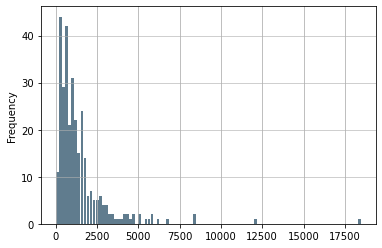

In [52]:
# 看讚數的分佈 y 軸是該讚數的貼文數 來看我們要怎麼取哪個讚數區間資料
commutes = wu_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [53]:
temp = wu_post[(wu_post['like_count'] <= 6000) & (wu_post['like_count'] > 1000)] #讚數大於500 小於1000才取 : 201  篇文章
temp

,new_date,message,jieba_results,like_count
160,2019-11-29,📣就是今天📣\n今晚七點，在福壽公園活動中心將舉辦總統 蔡英文 Tsai Ing-wen 、立委吳秉叡、議員 何淑峰 後援會成立大會；#2020台灣要贏，邀請所有支持小英、疼惜秉叡的新莊鄉親們一起來參加！ 蘇巧慧 立委也會來喔~\n \n🎉總統蔡英文、立委吳秉叡後援會成立大會🎉\n⏰活動時間: 11/29 (五) 19:00\n🏢活動地點: 福壽公園活動中心(新莊區昌明街1號)\n \n#2020台灣要贏\n#顧台灣會做事\n#蔡英文\n#吳秉叡\n#何淑峰,📣 就是 今天 📣 今晚 七點 在 福壽公園 活動 中心 將舉 辦 總統 蔡英文 立委 吳秉叡 議員 何淑峰 後 援會 成立 大會 台灣 要贏 邀請 所有 支持 小英 疼惜 秉 叡 的 新莊 鄉 親們 一起 來 參加 蘇巧慧 立委 也 會 來 喔 ~ 總統 蔡英文 立委 吳秉叡 後 援會 成立 大會 活動 時間 五 🏢 活動 地點 福壽公園 活動 中心 新莊 區 昌明 街 號 台灣 要贏 顧 台灣 會 做事 蔡英文 吳秉叡 何淑峰,1001
161,2019-11-25,小英新北競總熱鬧成立，舞台秀X園遊會邀您一起出來玩\n\n距離大選時間愈來愈近，2020 蔡英文 Tsai Ing-wen總統新北市競選總部將於12/1(日)盛大開幕🎊，當天除了會準備有趣的舞台表演🎭之外，也會準備園遊會市集🎪讓民眾同歡，週日大秉誠摯邀請您一同參與，讓我們出來玩的同時也一起為小英加油📣！\n\n活動時間⏰：12/1(日) 13:00-16:30\n活動地點🏟：板橋第二運動場(板橋區民權路117號)\n\n#2020台灣要贏\n#小英新北競總\n#舞台秀 X #園遊會,小英 新北 競總熱鬧 成立 舞台 秀 園遊會 邀 您 一起 出來 玩 距離 大選 時間 愈來 愈近 蔡英文 總統 新北市 競選總部 將於 日 盛大 開幕 🎊 當天 除了 會 準備 有趣 的 舞台 表演 🎭 之外 也 會 準備 園遊會 市集 🎪 讓民眾 同歡 週日 大秉誠摯 邀請 您 一同 參與 讓 我們 出來 玩 的 同時 也 一起 為小英 加油 📣 活動 時間 日 活動 地點 🏟 板橋 第二 運動場 板橋 區民權 路 號 台灣 要贏 小英 新北 競 總 舞台 秀 園遊會,1008
162,2019-08-08,由於強烈颱風利奇馬襲台，北北基己確認明日8/9(五)停班停課，請各位儘早做好防颱準備，秉叡祈求明日能平安無事，天祐台灣。\n \n🏤更多颱風動態可上中央氣象局網站查詢\nhttps://www.cwb.gov.tw/V7/forecast/\n \n🏦另外可上行政院人事行政總處網站查詢是否停班停課\nhttps://www.dgpa.gov.tw/typh/daily/nds.html\n \n#利奇馬颱風\n#新北停班停課\n#天祐台灣,由 於 強烈 颱 風利 奇馬襲 台 北北 基己 確認 明日 五 停班 停課 請 各位 儘 早 做好 防颱 準備 秉 叡 祈求 明日 能 平安 無事 天 祐 台灣 🏤 更 多 颱 風動態 可上 中央 氣象局 網站 查詢 🏦 另外 可 上 行政院 人事行政 總處 網站 查詢 是否 停班 停課 利奇馬 颱 風 新北 停班 停課 天 祐 台灣,1009
163,2019-11-05,八年前、相挺秉叡的新莊鄉親們成立了 秉友會，一路上勞心勞力為了秉叡籌辦各類活動，努力幫助秉叡在地方上發聲。八年過去，每逢春、秋兩季，秉友會都會舉辦捐血活動來號召民眾一同做愛心❤，從未間斷。\n\n本週六，秉友會一樣會在老地方，新莊運動公園旁【新莊號】捐血車🚑舉辦捐血活動。秉叡及秉友會全體會員邀請您一同挽起袖子奉獻熱血🙋‍♂🙋‍♀，為這社會添加更多的溫暖。\n\n⏰ 活動時間：11/09 (六)早上10點至晚上6點\n🔎 活動地點：新莊號捐血車（中華路一段&復興路一段交叉口)\n\nPS：捐完血也歡迎來旁邊的【新北市新住民園遊會】逛一逛哦🎈！\n\n#愛不單行邀您同行\n#新莊號捐血車,八年 前 相挺 秉 叡 的 新莊 鄉 親們 成立 了 秉友會 一路上 勞心 勞力 為 了 秉 叡 籌辦 各類 活動 努力 幫助 秉 叡 在 地方 上 發聲 八年 過去 每逢 春 秋 兩季 秉友會 都 會 舉辦 捐血 活動 來號 召民眾 一同 做愛心 ❤ 從 未間 斷 本週 六 秉友會 一樣 會 在 老 地方 新莊 運動 公園 旁 新莊 號 捐血 車 🚑 舉辦 捐血 活動 秉 叡 及秉友會 全體 會員邀 請 您 一同 挽起 袖子 奉獻 熱血 🙋 ‍ ♂ 🙋 ‍ 為 這社會 添加 更 多 的 溫暖 活動 時間 六 早上 點至 晚上 點 🔎 活動 地點 新莊 號 捐血 車 中華路 一段 復 興路 一段 交叉口 捐 完血 也 歡迎 來 旁邊 的 新北市 新 住民 園遊會 逛一逛 哦 🎈 愛不單 行邀 您 同行 新莊 號 捐血 車,1010
164,2019-08-11,大家早安！☀️ 周末假日持續衝衝衝！！🏃‍♂️\n \n這幾天大秉跑遍了新莊的大街小巷，跟鄉親朋友一起以虔敬之心款待好兄弟，也祈求希望台灣能風調雨順、國泰民安！\n \n#在路上看到大秉的身影別忘了跟我打招呼喔\n#太陽很大記得防曬補充水分喔 🥤\n#繼續衝 #繼續拚,大家 早安 ☀ ️ 周末 假日 持續 衝衝衝 🏃 ‍ ♂ ️ 這幾 天大 秉 跑遍 了 新莊 的 大街小巷 跟 鄉親 朋友 一起 以 虔敬 之心 款待 好 兄弟 也 祈求 希望 台灣 能風 調雨順 國泰 民安 在 路上 看到 大秉 的 身影 別 忘 了 跟 我 打招呼 喔 太陽 很大 記得 防曬 補充 水分 喔 🥤 繼續衝 繼續 拚,1021
...,...,...,...,...
305,2019-10-28,11/03(日) 早上八點至十二點，大秉與蔡英文 Tsai Ing-wen總統的新莊競總將在 #新莊青年公園 舉辦【#顧台灣會做事萬人登山活動⛰】，大秉邀請所有顧健康、愛爬山的鄉親朋友們，作伙來爬山、看風景，讓我們一起逗陣行🏃‍♂️🏃‍♂️，走出好健康！\n \n另外，當天也會設立【#大秉叢林探險】親子遊戲區，歡迎爸爸媽媽帶小朋友一起來爬山、玩遊戲，一同來親近大自然喔！\n \n⏰ 報到時間：11/03(日)早上8點至9點\n🔎 集合地點：新莊擎天府(新莊區壽山路55-1號)\n📢 PS.現場將提供限量 #帽子 與 #毛巾\n▶️ 活動傳送們：https://bit.ly/2p2vw7h,日 早上 八點 至 十二 點 大秉與 蔡英文 總統 的 新莊 競總將 在 新莊 青年 公園 舉辦 顧 台灣 會 做事 萬人 登山 活動 ⛰ 大秉邀 請 所有 顧 健康 愛 爬山 的 鄉親 朋友 們 作伙來 爬山 看風景 讓 我們 一起 逗陣行 🏃 ‍ ♂ ️ 🏃 ‍ ♂ ️ 走出 好 健康 另外 當天 也 會 設立 大秉叢林 探險 親子 遊戲區 歡迎 爸爸 媽媽 帶 小朋友 一起 來 爬山 玩遊戲 一同 來 親近 大自然 喔 報到 時間 日 早上 點至 點 🔎 集合 地點 新莊 擎天 府 新莊 區壽 山路 號 📢 現場將 提供 限量 帽子 與 毛巾 ️ 活動 傳送們,5078
306,2019-12-12,在台灣有高知名度的 賴清德院長，想必大家都非常熟悉，醫生出身的賴院長憑著熱忱與所學，積極投入台灣的公衛工作，在社會上擁有好名聲的賴院長，於1998年應民進黨的舉薦投入台南市立法委員的選舉便高票當選，並於之後三次的選舉皆連任成功，賴院長也沒讓選民失望，四屆立委任期都獲得公督盟評鑑問政第一名的肯定。之後憑著傲人的政績與高支持度，以60.41%的高得票率挑戰臺南市長成功，更在第二任破天荒以不設競總不插旗的方式參選，最後以優異的市政成績得到72.9%的超高得票率順利連任。\n \n賴院長做人處事圓融，不論對同事、對民眾都謙和有禮、不擺架子，但在是非對錯上又十分強硬，不會因個人毀譽或壓力妥協，如此剛柔並濟的賴院長實在是台灣難得一見的政治家，這次賴院長與小英總統一同搭配參選明年2020的正副總統，懇請大家全力支持，讓仁醫為國政解病灶、護台灣。\n \n12/15(日)， 賴清德院長將到秉叡的北新莊競總成立大會致詞讚聲，邀請大家也一起到新莊體育館前廣場為賴清德加油！\n \n活動時間⏰：12/15(日) 14:30\n活動地點🏟：新莊體育館前廣場(新莊區公園路、中華路一段交叉口)\n \n#台灣要贏新莊先贏\n#顧台灣會做事\n#北新莊競總\n#英德勝利,在 台灣 有 高 知名度 的 賴清德 院長 想必 大家 都 非常 熟悉 醫生 出身 的賴 院長 憑著 熱忱 與 所學 積極 投入 台灣 的 公衛 工作 在 社會 上 擁有 好 名聲 的賴 院長 於 年 應民進 黨 的 舉薦 投入 台南市 立法 委員 的 選舉 便 高票 當選 並 於 之 後 三次 的 選舉 皆 連任 成功 賴 院長 也 沒 讓 選民 失望 四屆 立委 任期 都 獲得 公督盟 評鑑 問政 第一名 的 肯定 之後憑 著 傲人 的 政績 與 高 支持 度 以 的 高 得票率 挑戰 臺 南市 長 成功 更 在 第二任 破天荒 以不設 競 總 不 插旗 的 方式 參選 最後以 優異 的 市政 成績 得到 的 超高 得票率 順利 連任 賴 院長 做人 處事 圓融 不論 對 同事 對民眾 都 謙 和 有禮 不 擺 架子 但 在 是非 對錯 上 又 十分 強硬 不會 因個 人 毀譽 或 

TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [54]:
corpus = temp['jieba_results'].values.tolist() #如果不做這個、結果會不同 太generall

In [55]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
X = vectorizer.fit_transform(corpus) #  input must be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X) # X : corpus x word matrix, output:201 x 4835

In [56]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一一,一下,一些,一份,一位,一個,一元,一再,一切,一切都是,...,黨並,黨團,黨政,黨文,黨派,黨籍候,黨部,鼓勵,鼻咽癌,龐大
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.070225,0.0,0.0,0.0,0.0
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [57]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['努力', '評鑑', '除了', '新北市', '新莊', '法官', '地方', '台灣', '建設', '中央']
TOP 10 WORDS PER TOPIC #1
['地點', '要贏', '時間', '吳秉叡', '一起', '做事', '總統', '活動', '台灣', '新莊']
TOP 10 WORDS PER TOPIC #2
['選區', '努力', '感謝', '大家', '民主', '繼續', '總統', '守護', '我們', '台灣']
TOP 10 WORDS PER TOPIC #3
['各位', '照顧', '大家', '中心', '孩子', '公共', '新莊', '課綱', '活動', '幼兒園']
TOP 10 WORDS PER TOPIC #4
['交通', '計畫', '居民', '做事', '我們', '改善', '台灣', '工程', '地方', '新莊']
TOP 10 WORDS PER TOPIC #5
['向前', '新莊', '才能', '努力', '大家', '轉型', '除了', '一起', '台灣', '我們']
TOP 10 WORDS PER TOPIC #6
['中正路', '環境', '車流', '持續', '醫療', '匝道', '爭取', '服務', '改善', '新莊']
TOP 10 WORDS PER TOPIC #7
['台灣', '人生', '一起', '新北市', '服務', '敬老', '眼鏡', '免費', '新莊', '活動']


In [58]:

LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['努力', '號碼', '本金', '眼睛', '翡翠', '申請', '老師', '史明', '台灣', '住民']
TOP 10 WORDS PER TOPIC #1
['自由', '媽媽', '自己', '除了', '改善', '補助', '棒球', '持續', '法官', '香港']
TOP 10 WORDS PER TOPIC #2
['大會', '成立', '蔡英文', '立委', '要贏', '吳秉叡', '活動', '總統', '台灣', '新莊']
TOP 10 WORDS PER TOPIC #3
['交通', '康乃馨', '不再', '噪音', '交通部', '高點', '捐血', '車流', '地方', '匝道']
TOP 10 WORDS PER TOPIC #4
['堤外', '政治', '桃園', '司法', '污水', '推出', '蘇院長', '幼兒園', '中國', '台灣']
TOP 10 WORDS PER TOPIC #5
['生日', '自己', '除夕', '課綱', '孩子', '計畫', '巧慧', '新莊', '人民', '二期']
TOP 10 WORDS PER TOPIC #6
['呼清', '身分', '中心', '新北市', '服務', '敬老', '眼鏡', '免費', '新莊', '活動']
TOP 10 WORDS PER TOPIC #7
['我們', '投資', '醫療', '越南', '蛋糕', '選區', '繼續', '美食', '住民', '園遊會']


In [106]:
#政見做斷詞

politics_wu = politics[politics.姓名 == "吳秉叡"].政見.to_string()
politics_wu = re.sub(re_punctuation, "", politics_wu)
politics_wu = re.sub(r'[0-9]','',politics_wu)
politics_wu = re.sub(r'[a-zA-Z]','',politics_wu)
politics_wu = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗、，」「（）]','',politics_wu)  # 注意裡面不能有空白！
jieba.load_userdict("wu_dict.txt")
politics_words = jieba.lcut(politics_wu, cut_all = False)


In [105]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_wu, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)


In [70]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(politics_words)  
p_colword = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=8, random_state=None)

#政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)


TOP 10 WORDS PER TOPIC #0
['一同', '一份', '一波', '上學', '一帶', '一一', '一則', '一貫', '三重', '上下班']
TOP 10 WORDS PER TOPIC #1
['一期', '一生', '下一代', '一致', '三年', '一組', '一點', '一拖', '一再', '一府']
TOP 10 WORDS PER TOPIC #2
['一下', '三月', '上次', '一直', '一線', '一日', '一百', '一早', '一刻', '一勝']
TOP 10 WORDS PER TOPIC #3
['一名', '一天', '一些', '七千', '下午', '一張', '一般', '下個', '一齊來', '三度']
TOP 10 WORDS PER TOPIC #4
['一次', '一棒', '三萬', '三個', '一場場', '上坡路', '三人', '一塊', '一見', '一次性']
TOP 10 WORDS PER TOPIC #5
['上午', '一位', '上任', '下去', '上路', '不便', '下雨', '一切都是', '上下', '下手']
TOP 10 WORDS PER TOPIC #6
['三萬調', '一黨', '上游', '一鑿', '下面', '三項', '一級', '一統', '不停', '一腳']
TOP 10 WORDS PER TOPIC #7
['上萬名', '一月', '一起', '一段', '一千四百', '一度', '下通過', '一元', '七點', '上後能']


In [71]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ') 

一同, 一份, 一波, 上學, 一帶, 一一, 一則, 一貫, 三重, 上下班, 一期, 一生, 下一代, 一致, 三年, 一組, 一點, 一拖, 一再, 一府, 一下, 三月, 上次, 一直, 一線, 一日, 一百, 一早, 一刻, 一勝, 一名, 一天, 一些, 七千, 下午, 一張, 一般, 下個, 一齊來, 三度, 一次, 一棒, 三萬, 三個, 一場場, 上坡路, 三人, 一塊, 一見, 一次性, 上午, 一位, 上任, 下去, 上路, 不便, 下雨, 一切都是, 上下, 下手, 三萬調, 一黨, 上游, 一鑿, 下面, 三項, 一級, 一統, 不停, 一腳, 上萬名, 一月, 一起, 一段, 一千四百, 一度, 下通過, 一元, 七點, 上後能, 

In [72]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#產業升級、園區、高科技園區、加工區 、楠梓、交通、三鐵同構

Counter({'一同': 1,
         '一份': 1,
         '一波': 1,
         '上學': 1,
         '一帶': 1,
         '一一': 1,
         '一則': 1,
         '一貫': 1,
         '三重': 1,
         '上下班': 1,
         '一期': 1,
         '一生': 1,
         '下一代': 1,
         '一致': 1,
         '三年': 1,
         '一組': 1,
         '一點': 1,
         '一拖': 1,
         '一再': 1,
         '一府': 1,
         '一下': 1,
         '三月': 1,
         '上次': 1,
         '一直': 1,
         '一線': 1,
         '一日': 1,
         '一百': 1,
         '一早': 1,
         '一刻': 1,
         '一勝': 1,
         '一名': 1,
         '一天': 1,
         '一些': 1,
         '七千': 1,
         '下午': 1,
         '一張': 1,
         '一般': 1,
         '下個': 1,
         '一齊來': 1,
         '三度': 1,
         '一次': 1,
         '一棒': 1,
         '三萬': 1,
         '三個': 1,
         '一場場': 1,
         '上坡路': 1,
         '三人': 1,
         '一塊': 1,
         '一見': 1,
         '一次性': 1,
         '上午': 1,
         '一位': 1,
         '上任': 1,
         '下去': 1,
         '上路': 1,
    

我們可以用 臉書貼文和政見 Topic word 的交集 會推測
劉世芳的幾個重點
1. 經濟相關的科技 園區和加工區
    - 高科技、發展、產業、加工區、園區、產業、就業、計畫、建設、
2. 楠梓地區
    -楠梓
3. 交通
    -三鐵同構、中油、交通、
4. 環境
    -環境、綠能、

高科技 相關tf idf 高 (以下討論臉書貼文)

In [73]:
top_10_message = tfidf_view.sort_values(by = ['新莊'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['新莊'], ascending = False).head(10)

,一一,一下,一些,一份,一位,一個,一元,一再,一切,一切都是,...,黨並,黨團,黨政,黨文,黨派,黨籍候,黨部,鼓勵,鼻咽癌,龐大
120,0.0,0.0,0.0,0.0,0.000000,0.0,0.174177,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
149,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
109,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
121,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
137,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
102,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
141,0.0,0.0,0.0,0.0,0.072455,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0833,0.0,0.0,0.0


In [74]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[120,]).sort_values(by = 120, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,120
新莊,0.437977
武聖廟,0.348354
參拜,0.321825
金豬,0.321825
紅包,0.174177
...,...
宜蘭,0.000000
客廳,0.000000
客死,0.000000
客運,0.000000


In [75]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

130    車流
131    巧慧
132    自己
133    車流
134    市長
135    課綱
136    法官
137    新莊
138    登記
139    升學
140    感謝
141    新莊
142    總統
143    初選
144    三月
145    爬山
146    院長
147    選區
148    機車
149    新莊
Name: term, dtype: object

In [77]:
#假如以剛剛科學園區相關主題為例 想看tfidf 最高的詞是科學園區的文章
message_newtfidf[message_newtfidf['term']=="新莊"]

,一一,一下,一些,一份,一位,一個,一元,一再,一切,一切都是,...,黨團,黨政,黨文,黨派,黨籍候,黨部,鼓勵,鼻咽癌,龐大,term
71,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,新莊
97,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,新莊
102,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,新莊
109,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,新莊
120,0.0,0.0,0.0,0.0,0.000000,0.0,0.174177,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,新莊
121,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,新莊
137,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,新莊
141,0.0,0.0,0.0,0.0,0.072455,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0833,0.0,0.0,0.0,新莊
149,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,新莊


In [79]:
# 會發現文章出現tfidf是產業的很少，很正常 因為出現太多反而tfidf不會高！
temp.iloc[71,]

new_date                                                                                                                                                                                                                                                                                              2019-12-22
message                                      📣新莊的鄉親看過來📣\n今天下午兩點半， 南新莊競選總部成立大會盛大舉辦，除了有精采節目表演外， 陳建仁 Chen Chien-Jen副總統、 賴清德副總統候選人、 蘇貞昌院長也會到現場站台助講。\n\n#2020台灣要贏，邀請所有支持小英、疼惜秉叡的新莊鄉親們一同來參加。\n\n🎉總統蔡英文、立委吳秉叡-南新莊競選總部成立大會🎉\n⏰活動時間: 12/22(日) 14:30\n🏢活動地點: 福營國中風雨操場(新莊區富國路105號)\n\n#票投3號英德配 #做你靠3吳秉叡\n#台灣要贏新莊先贏\n#顧台灣會做事
jieba_results     📣 新莊 的 鄉親 看過 來 📣 今天下午 兩點 半 南 新莊 競選總部 成立 大會 盛大 舉辦 除了 有 精采 節目 表演 外 陳 建仁     副 總統 賴清德 副 總統 候選人 蘇貞昌 院長 也 會 到 現場 站台 助講    台灣 要贏 邀請 所有 支持 小英 疼惜 秉 叡 的 新莊 鄉 親們 一同 來 參加   總統 蔡英文 立委 吳秉叡  南 新莊 競選總部 成立 大會   活動 時間   日   🏢 活動 地點 福營國 中風雨 操場 新莊 區富 國路  號  票 投  號 英德 配  做 你 靠  吳秉叡  台灣 要贏 新莊 先贏  顧 台灣 會 做事
like_count                                                                           

來看楠梓 ： 在臉書發文的topic中topic2,4,7 出現很多次楠梓 

In [82]:
message_newtfidf[message_newtfidf['term']=="院長"]

,一一,一下,一些,一份,一位,一個,一元,一再,一切,一切都是,...,黨團,黨政,黨文,黨派,黨籍候,黨部,鼓勵,鼻咽癌,龐大,term
146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,院長


In [83]:
temp.iloc[[146],2]

306     在 台灣 有 高 知名度 的 賴清德 院長 想必 大家 都 非常 熟悉 醫生 出身 的賴 院長 憑著 熱忱 與 所學 積極 投入 台灣 的 公衛 工作 在 社會 上 擁有 好 名聲 的賴 院長 於  年 應民進 黨 的 舉薦 投入 台南市 立法 委員 的 選舉 便 高票 當選 並 於 之 後 三次 的 選舉 皆 連任 成功 賴 院長 也 沒 讓 選民 失望 四屆 立委 任期 都 獲得 公督盟 評鑑 問政 第一名 的 肯定  之後憑 著 傲人 的 政績 與 高 支持 度 以  的 高 得票率 挑戰 臺 南市 長 成功 更 在 第二任 破天荒 以不設 競 總 不 插旗 的 方式 參選 最後以 優異 的 市政 成績 得到  的 超高 得票率 順利 連任  　 賴 院長 做人 處事 圓融 不論 對 同事 對民眾 都 謙 和 有禮 不 擺 架子 但 在 是非 對錯 上 又 十分 強硬 不會 因個 人 毀譽 或 壓力 妥協 如此 剛柔 並濟的賴 院長 實在 是 台灣 難得 一見 的 政治家 這次賴 院長 與 小英 總統 一同 搭配 參選 明年  的 正副 總統 懇請 大家 全力支持 讓 仁 醫為 國政解 病灶 護 台灣  　   日 賴清德 院長 將到 秉 叡 的 北 新莊 競總成 立大會致 詞 讚 聲 邀請 大家 也 一起 到 新莊 體育館 前廣場 為 賴清德 加油 　 活動 時間    日   活動 地點 🏟 新莊 體育館 前廣場 新莊 區公園 路 中華路 一段 交叉口 　  台灣 要贏 新莊 先贏  顧 台灣 會 做事  北 新莊 競總  英德 勝利
Name: jieba_results, dtype: object

In [84]:
# LDA : 看每篇文章被分配在哪些主題  (tfidf)
#review topic 結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['努力', '號碼', '本金', '眼睛', '翡翠', '申請', '老師', '史明', '台灣', '住民']
TOP 10 WORDS PER TOPIC #1
['自由', '媽媽', '自己', '除了', '改善', '補助', '棒球', '持續', '法官', '香港']
TOP 10 WORDS PER TOPIC #2
['大會', '成立', '蔡英文', '立委', '要贏', '吳秉叡', '活動', '總統', '台灣', '新莊']
TOP 10 WORDS PER TOPIC #3
['交通', '康乃馨', '不再', '噪音', '交通部', '高點', '捐血', '車流', '地方', '匝道']
TOP 10 WORDS PER TOPIC #4
['堤外', '政治', '桃園', '司法', '污水', '推出', '蘇院長', '幼兒園', '中國', '台灣']
TOP 10 WORDS PER TOPIC #5
['生日', '自己', '除夕', '課綱', '孩子', '計畫', '巧慧', '新莊', '人民', '二期']
TOP 10 WORDS PER TOPIC #6
['呼清', '身分', '中心', '新北市', '服務', '敬老', '眼鏡', '免費', '新莊', '活動']
TOP 10 WORDS PER TOPIC #7
['我們', '投資', '醫療', '越南', '蛋糕', '選區', '繼續', '美食', '住民', '園遊會']


In [86]:
#可以猜猜看第一篇文是哪個topic 
temp.iloc[:,[0,2]]

,new_date,jieba_results
160,2019-11-29,📣 就是 今天 📣 今晚 七點 在 福壽公園 活動 中心 將舉 辦 總統 蔡英文 立委 吳秉叡 議員 何淑峰 後 援會 成立 大會 台灣 要贏 邀請 所有 支持 小英 疼惜 秉 叡 的 新莊 鄉 親們 一起 來 參加 蘇巧慧 立委 也 會 來 喔 ~ 總統 蔡英文 立委 吳秉叡 後 援會 成立 大會 活動 時間 五 🏢 活動 地點 福壽公園 活動 中心 新莊 區 昌明 街 號 台灣 要贏 顧 台灣 會 做事 蔡英文 吳秉叡 何淑峰
161,2019-11-25,小英 新北 競總熱鬧 成立 舞台 秀 園遊會 邀 您 一起 出來 玩 距離 大選 時間 愈來 愈近 蔡英文 總統 新北市 競選總部 將於 日 盛大 開幕 🎊 當天 除了 會 準備 有趣 的 舞台 表演 🎭 之外 也 會 準備 園遊會 市集 🎪 讓民眾 同歡 週日 大秉誠摯 邀請 您 一同 參與 讓 我們 出來 玩 的 同時 也 一起 為小英 加油 📣 活動 時間 日 活動 地點 🏟 板橋 第二 運動場 板橋 區民權 路 號 台灣 要贏 小英 新北 競 總 舞台 秀 園遊會
162,2019-08-08,由 於 強烈 颱 風利 奇馬襲 台 北北 基己 確認 明日 五 停班 停課 請 各位 儘 早 做好 防颱 準備 秉 叡 祈求 明日 能 平安 無事 天 祐 台灣 🏤 更 多 颱 風動態 可上 中央 氣象局 網站 查詢 🏦 另外 可 上 行政院 人事行政 總處 網站 查詢 是否 停班 停課 利奇馬 颱 風 新北 停班 停課 天 祐 台灣
163,2019-11-05,八年 前 相挺 秉 叡 的 新莊 鄉 親們 成立 了 秉友會 一路上 勞心 勞力 為 了 秉 叡 籌辦 各類 活動 努力 幫助 秉 叡 在 地方 上 發聲 八年 過去 每逢 春 秋 兩季 秉友會 都 會 舉辦 捐血 活動 來號 召民眾 一同 做愛心 ❤ 從 未間 斷 本週 六 秉友會 一樣 會 在 老 地方 新莊 運動 公園 旁 新莊 號 捐血 車 🚑 舉辦 捐血 活動 秉 叡 及秉友會 全體 會員邀 請 您 一同 挽起 袖子 奉獻 熱血 🙋 ‍ ♂ 🙋 ‍ 為 這社會 添加 更 多 的 溫暖 活動 時間 六 早上 點至 晚上 點 🔎 活動 地點 新莊 號 捐血 車 中華路 一段 復 興路 一段 交叉口 捐 完血 也 歡迎 來 旁邊 的 新北市 新 住民 園遊會 逛一逛 哦 🎈 愛不單 行邀 您 同行 新莊 號 捐血 車
164,2019-08-11,大家 早安 ☀ ️ 周末 假日 持續 衝衝衝 🏃 ‍ ♂ ️ 這幾 天大 秉 跑遍 了 新莊 的 大街小巷 跟 鄉親 朋友 一起 以 虔敬 之心 款待 好 兄弟 也 祈求 希望 台灣 能風 調雨順 國泰 民安 在 路上 看到 大秉 的 身影 別 忘 了 跟 我 打招呼 喔 太陽 很大 記得 防曬 補充 水分 喔 🥤 繼續衝 繼續 拚
...,...,...
305,2019-10-28,日 早上 八點 至 十二 點 大秉與 蔡英文 總統 的 新莊 競總將 在 新莊 青年 公園 舉辦 顧 台灣 會 做事 萬人 登山 活動 ⛰ 大秉邀 請 所有 顧 健康 愛 爬山 的 鄉親 朋友 們 作伙來 爬山 看風景 讓 我們 一起 逗陣行 🏃 ‍ ♂ ️ 🏃 ‍ ♂ ️ 走出 好 健康 另外 當天 也 會 設立 大秉叢林 探險 親子 遊戲區 歡迎 爸爸 媽媽 帶 小朋友 一起 來 爬山 玩遊戲 一同 來 親近 大自然 喔 報到 時間 日 早上 點至 點 🔎 集合 地點 新莊 擎天 府 新莊 區壽 山路 號 📢 現場將 提供 限量 帽子 與 毛巾 ️ 活動 傳送們
306,2019-12-12,在 台灣 有 高 知名度 的 賴清德 院長 想必 大家 都 非常 熟悉 醫生 出身 的賴 院長 憑著 熱忱 與 所學 積極 投入 台灣 的 公衛 工作 在 社會 上 擁有 好 名聲 的賴 院長 於 年 應民進 黨 的 舉薦 投入 台南市 立法 委員 的 選舉 便 高票 當選 並 於 之 後 三次 的 選舉 皆 連任 成功 賴 院長 也 沒 讓 選民 失望 四屆 立委 任期 都 獲得 公督盟 評鑑 問政 第一名 的 肯定 之後憑 著 傲人 的 政績 與 高 支持 度 以 的 高 得票率 挑戰 臺 南市 長 成功 更 在 第二任 破天荒 以不設 競 總 不 插旗 的 方式 參選 最後以 優異 的 市政 成績 得到 的 超高 得票率 順利 連任 賴 院長 做人 處事 圓融 不論 對 同事 對民眾 都 謙 和 有禮 不 擺 架子 但 在 是非 對錯 上 又 十分 強硬 不會 因個 人 毀譽 或 壓力 妥協 如此 剛柔 並濟的賴 院長 實在 是 台灣 難得 一見 的 政治家 這次賴 院長 與 小英 總統 一同 搭配 參選 明年 的 正副 總統 懇請 大家 全力支持 讓 仁 醫為 國政解 病灶 護 台灣 日 賴清德 院長 將到 秉 叡 的 北 新莊 競總成 立大會致 詞 讚 聲 邀請 大家 也 一起 到 新莊 體育館 前廣場 為 賴清德 加油 活動 時間 日 活動 地點 🏟 新莊 體育館 前廣場 新莊 區公園 路 中華路 一段 交叉口 台灣 要贏 新莊 先贏 顧 台灣 會 做事 北 新莊 競總 英德 勝利
307,2019-11-19,昨天 秉 叡 與 另外 位 優秀黨籍 立委 候選人 在 賴清德 副 總統 候選人 游錫堃 前 院長 以及 卓榮泰 主席 的 祝福 和 勉勵 下 一同 完成 立委 候選人 的 登記 作業 為 了 成為 蔡英文 總統 明年 執政 最 有力 的 靠山 賴 游兩位 院長 親自為 所有 黨籍候 選人 穿 上 球衣 球帽 期許 所有 候選人 能 在 明年 揮出 漂亮 的 一棒 達成 新北 全壘 打 國會過 半 的 目標 讓 蔡 總統 執政 路上 不孤單 更 有 力量 捍衛 民主 守護 台灣 明年 大選 除了 請 大家 繼續 支持 小英 總統 和 秉 叡 外 也 請 支持 所有 民進 黨 優秀 的 候選人 ⚾ 民進 黨 立委 新北隊 隊員名 單 ⚾ 第 選區 呂孫綾 第 選區 林淑芬 第 選區 余天 第 選區 吳秉叡 第 選區 蘇巧慧 第 選區 張宏陸 第 選區 羅 致政粉 絲團 第 選區 立法 委員 江 永昌 第 選區 蔡沐霖 第 選區 吳琪銘 第 選區 張銘 祐 銘記 在 新 第 選區 賴品 妤 🎥 新北 全壘 打 國會 就 過半 實況 影片 顧 台灣 會 做事 團結 贏得 大選 總統 要 贏國會 要 過半
308,2019-09-08,機車 等同 是 台灣 人 的 雙腳 台灣 人 的 生活 台灣 是 摩托 車王國 有 一千四百 萬台 機車 兩萬 八千 間 機車行 也 維 繫 數 十 萬 人 的 生 計 命 脈 從 電動 機車 的 技術 革新 還有 兩萬 八千 間 機車 行頭家 的 生計 到 台灣 的 空 汙 環境 政府 都 要 顧到 好 才 行 機車 產業 正在 邁向 新 時代 這既是 機會 也 是 挑戰 所以 今天 蘇貞昌 院長 邀請 了 摩托 車行 的 老 闆 幾 大 製 造 摩托 車的業者 銀行 總經理 勞動部 經濟部 財政部 環保署 等 單位 一起 來座 談 就是 要 解決 摩托 車行 頭家們 的 困難 未來 由 政府 出錢 廠商 提供 教學 資源 讓 摩托 車行 的 技術順 利升 級 全勤 者 還可領 有 由 三個 部長 背書 的 證書 除此之外 從機 車行 店面 的 改頭 換面 電動車 零件 製 造 的 釋 出 貨物稅 的 減免 老車汰換 的 補助 蘇貞昌 院長 與 各部 會 的 首長 也 都 允諾將 給業者 機車 行頭家 及 全國 機車 騎士們 最大 及 最 有效 的 支持 秉 叡 也 將擔 任溝 通的橋 樑 緊 盯 進度並 反映 所有 機車 行頭家 與 機車 騎士們 的 需要 大家 務實 解決 問題 一起 兼顧 台灣 人 通行 的 需要 及 環境 的 保護


In [87]:
#LDA classification 
temp["topic"]=""#add new column 

doc_topic = LDA.transform(tfidf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()

    temp.iloc[n,4] = topic_most_pr
temp

<ipython-input-87-3dbfd841bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["topic"]=""#add new column
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,new_date,message,jieba_results,like_count,topic
160,2019-11-29,📣就是今天📣\n今晚七點，在福壽公園活動中心將舉辦總統 蔡英文 Tsai Ing-wen 、立委吳秉叡、議員 何淑峰 後援會成立大會；#2020台灣要贏，邀請所有支持小英、疼惜秉叡的新莊鄉親們一起來參加！ 蘇巧慧 立委也會來喔~\n \n🎉總統蔡英文、立委吳秉叡後援會成立大會🎉\n⏰活動時間: 11/29 (五) 19:00\n🏢活動地點: 福壽公園活動中心(新莊區昌明街1號)\n \n#2020台灣要贏\n#顧台灣會做事\n#蔡英文\n#吳秉叡\n#何淑峰,📣 就是 今天 📣 今晚 七點 在 福壽公園 活動 中心 將舉 辦 總統 蔡英文 立委 吳秉叡 議員 何淑峰 後 援會 成立 大會 台灣 要贏 邀請 所有 支持 小英 疼惜 秉 叡 的 新莊 鄉 親們 一起 來 參加 蘇巧慧 立委 也 會 來 喔 ~ 總統 蔡英文 立委 吳秉叡 後 援會 成立 大會 活動 時間 五 🏢 活動 地點 福壽公園 活動 中心 新莊 區 昌明 街 號 台灣 要贏 顧 台灣 會 做事 蔡英文 吳秉叡 何淑峰,1001,2
161,2019-11-25,小英新北競總熱鬧成立，舞台秀X園遊會邀您一起出來玩\n\n距離大選時間愈來愈近，2020 蔡英文 Tsai Ing-wen總統新北市競選總部將於12/1(日)盛大開幕🎊，當天除了會準備有趣的舞台表演🎭之外，也會準備園遊會市集🎪讓民眾同歡，週日大秉誠摯邀請您一同參與，讓我們出來玩的同時也一起為小英加油📣！\n\n活動時間⏰：12/1(日) 13:00-16:30\n活動地點🏟：板橋第二運動場(板橋區民權路117號)\n\n#2020台灣要贏\n#小英新北競總\n#舞台秀 X #園遊會,小英 新北 競總熱鬧 成立 舞台 秀 園遊會 邀 您 一起 出來 玩 距離 大選 時間 愈來 愈近 蔡英文 總統 新北市 競選總部 將於 日 盛大 開幕 🎊 當天 除了 會 準備 有趣 的 舞台 表演 🎭 之外 也 會 準備 園遊會 市集 🎪 讓民眾 同歡 週日 大秉誠摯 邀請 您 一同 參與 讓 我們 出來 玩 的 同時 也 一起 為小英 加油 📣 活動 時間 日 活動 地點 🏟 板橋 第二 運動場 板橋 區民權 路 號 台灣 要贏 小英 新北 競 總 舞台 秀 園遊會,1008,6
162,2019-08-08,由於強烈颱風利奇馬襲台，北北基己確認明日8/9(五)停班停課，請各位儘早做好防颱準備，秉叡祈求明日能平安無事，天祐台灣。\n \n🏤更多颱風動態可上中央氣象局網站查詢\nhttps://www.cwb.gov.tw/V7/forecast/\n \n🏦另外可上行政院人事行政總處網站查詢是否停班停課\nhttps://www.dgpa.gov.tw/typh/daily/nds.html\n \n#利奇馬颱風\n#新北停班停課\n#天祐台灣,由 於 強烈 颱 風利 奇馬襲 台 北北 基己 確認 明日 五 停班 停課 請 各位 儘 早 做好 防颱 準備 秉 叡 祈求 明日 能 平安 無事 天 祐 台灣 🏤 更 多 颱 風動態 可上 中央 氣象局 網站 查詢 🏦 另外 可 上 行政院 人事行政 總處 網站 查詢 是否 停班 停課 利奇馬 颱 風 新北 停班 停課 天 祐 台灣,1009,5
163,2019-11-05,八年前、相挺秉叡的新莊鄉親們成立了 秉友會，一路上勞心勞力為了秉叡籌辦各類活動，努力幫助秉叡在地方上發聲。八年過去，每逢春、秋兩季，秉友會都會舉辦捐血活動來號召民眾一同做愛心❤，從未間斷。\n\n本週六，秉友會一樣會在老地方，新莊運動公園旁【新莊號】捐血車🚑舉辦捐血活動。秉叡及秉友會全體會員邀請您一同挽起袖子奉獻熱血🙋‍♂🙋‍♀，為這社會添加更多的溫暖。\n\n⏰ 活動時間：11/09 (六)早上10點至晚上6點\n🔎 活動地點：新莊號捐血車（中華路一段&復興路一段交叉口)\n\nPS：捐完血也歡迎來旁邊的【新北市新住民園遊會】逛一逛哦🎈！\n\n#愛不單行邀您同行\n#新莊號捐血車,八年 前 相挺 秉 叡 的 新莊 鄉 親們 成立 了 秉友會 一路上 勞心 勞力 為 了 秉 叡 籌辦 各類 活動 努力 幫助 秉 叡 在 地方 上 發聲 八年 過去 每逢 春 秋 兩季 秉友會 都 會 舉辦 捐血 活動 來號 召民眾 一同 做愛心 ❤ 從 未間 斷 本週 六 秉友會 一樣 會 在 老 地方 新莊 運動 公園 旁 新莊 號 捐血 車 🚑 舉辦 捐血 活動 秉 叡 及秉友會 全體 會員邀 請 您 一同 挽起 袖子 奉獻 熱血 🙋 ‍ ♂ 🙋 ‍ 為 這社會 添加 更 多 的 溫暖 活動 時間 六 早上 點至 晚上 點 🔎 活動 地點 新莊 號 捐血 車 中華路 一段 復 興路 一段 交叉口 捐 完血 也 歡迎 來 旁邊 的 新北市 新 住民 園遊會 逛一逛 哦 🎈 愛不單 行邀 您 同行 新莊 號 捐血 車,1010,3
164,2019-08-11,大家早安！☀️ 周末假日持續衝衝衝！！🏃‍♂️\n \n這幾天大秉跑遍了新莊的大街小巷，跟鄉親朋友一起以虔敬之心款待好兄弟，也祈求希望台灣能風調雨順、國泰民安！\n \n#在路上看到大秉的身影別忘了跟我打招呼喔\n#太陽很大記得防曬補充水分喔 🥤\n#繼續衝 #繼續拚,大家 早安 ☀ ️ 周末 假日 持續 衝衝衝 🏃 ‍ ♂ ️ 這幾 天大 秉 跑遍 了 新莊 的 大街小巷 跟 鄉親 朋友 一起 以 虔敬 之心 款待 好 兄弟 也 祈求 希望 台灣 能風 調雨順 國泰 民安 在 路上 看到 大秉 的 身影 別 忘 了 跟 我 打招呼 喔 太陽 很大 記得 防曬 補充 水分 喔 🥤 繼續衝 繼續 拚,1021,6
...,...,...,...,...,...
305,2019-10-28,11/03(日) 早上八點至十二點，大秉與蔡英文 Tsai Ing-wen總統的新莊競總將在 #新莊青年公園 舉辦【#顧台灣會做事萬人登山活動⛰】，大秉邀請所有顧健康、愛爬山的鄉親朋友們，作伙來爬山、看風景，讓我們一起逗陣行🏃‍♂️🏃‍♂️，走出好健康！\n \n另外，當天也會設立【#大秉叢林探險】親子遊戲區，歡迎爸爸媽媽帶小朋友一起來爬山、玩遊戲，一同來親近大自然喔！\n \n⏰ 報到時間：11/03(日)早上8點至9點\n🔎 集合地點：新莊擎天府(新莊區壽山路55-1號)\n📢 PS.現場將提供限量 #帽子 與 #毛巾\n▶️ 活動傳送們：https://bit.ly/2p2vw7h,日 早上 八點 至 十二 點 大秉與 蔡英文 總統 的 新莊 競總將 在 新莊 青年 公園 舉辦 顧 台灣 會 做事 萬人 登山 活動 ⛰ 大秉邀 請 所有 顧 健康 愛 爬山 的 鄉親 朋友 們 作伙來 爬山 看風景 讓 我們 一起 逗陣行 🏃 ‍ ♂ ️ 🏃 ‍ ♂ ️ 走出 好 健康 另外 當天 也 會 設立 大秉叢林 探險 親子 遊戲區 歡迎 爸爸 媽媽 帶 小朋友 一起 來 爬山 玩遊戲 一同 來 親近 大自然 喔 報到 時間 日 早上 點至 點 🔎 集合 地點 新莊 擎天 府 新莊 區壽 山路 號 📢 現場將 提供 限量 帽子 與 毛巾 ️ 活動 傳送們,5078,2
306,2019-12-12,在台灣有高知名度的 賴清德院長，想必大家都非常熟悉，醫生出身的賴院長憑著熱忱與所學，積極投入台灣的公衛工作，在社會上擁有好名聲的賴院長，於1998年應民進黨的舉薦投入台南市立法委員的選舉便高票當選，並於之後三次的選舉皆連任成功，賴院長也沒讓選民失望，四屆立委任期都獲得公督盟評鑑問政第一名的肯定。之後憑著傲人的政績與高支持度，以60.41%的高得票率挑戰臺南市長成功，更在第二任破天荒以不設競總不插旗的方式參選，最後以優異的市政成績得到72.9%的超高得票率順利連任。\n \n賴院長做人處事圓融，不論對同事、對民眾都謙和有禮、不擺架子，但在是非對錯上又十分強硬，不會因個人毀譽或壓力妥協，如此剛柔並濟的賴院長實在是台灣難得一見的政治家，這次賴院長與小英總統一同搭配參選明年2020的正副總統，懇請大家全力支持，讓仁醫為國政解病灶、護台灣。\n \n12/15(日)， 賴清德院長將到秉叡的北新莊競總成立大會致詞讚聲，邀請大家也一起到新莊體育館前廣場為賴清德加油！\n \n活動時間⏰：12/15(日) 14:30\n活動地點🏟：新莊體育館前廣場(新莊區公園路、中華路一段交叉口)\n \n#台灣要贏新莊先贏\n#顧台灣會做事\n#北新莊競總\n#英德勝利,在 台灣 有 高 知名度 的 賴清德 院長 想必 大家 都 非常 熟悉 醫生 出身 的賴 院長 憑著 熱忱 與 所學 積極 投入 台灣 的 公衛 工作 在 社會 上 擁有 好 名聲 的賴 院長 於 年 應民進 黨 的 舉薦 投入 台南市 立法 委員 的 選舉 便 高票 當選 並 於 之 後 三次 的 選舉 皆 連任 成功 賴 院長 也 沒 讓 選民 失望 四屆 立委 任期 都 獲得 公督盟 評鑑 問政 第一名 的 肯定 之後憑 著 傲人 的 政績 與 高 支持 度 以 的 高 得票率 挑戰 臺 南市 長 成功 更 在 第二任 破天荒 以不設 競 總 不 插旗 的 方式 參選 最後以 優異 的 市政 成績 得到 的 超高 得票率 順利 連任 賴 院長 做人 處事 圓融 不論 對 同事 對民眾 都 謙 和 有禮 不 擺 架子 但 在 是非 對錯 上

In [88]:
可以看到第19 貼文 真的是和topic5:服務 有關
        23貼文 也屬於topic4: 市場 相關

SyntaxError: invalid syntax (<ipython-input-88-4cdcbedd68b1>, line 1)

In [89]:
Counter(temp.iloc[-20:, 4])
#這邊可以看到在讚數top20 多的那些文章中 哪些主題比較熱門
#Topic 0,5,7 這些主題相關比較熱門

Counter({3: 2, 5: 1, 1: 7, 2: 5, 6: 3, 0: 1, 7: 1})

臉書發文的Topic 0,5,7比較常出現 
TOP 10 WORDS PER TOPIC #0
['高雄市', '大家', '一抹黑', '一天', '注意', '安全', '世芳', '朋友', '分享', '台灣']

TOP 10 WORDS PER TOPIC #5
['美國', '工程', '我們', '大雨', '改變', '提高', '國家', '自由', '發言', '台灣']

TOP 10 WORDS PER TOPIC #7
['經濟', '軍人節', '問好', '自由黃昏市場', '初選', '台灣', '市長', '楠梓', '我們', '韓市']

回去對政見做印證
政見Topic 
TOP 10 WORDS PER TOPIC #0
['東西', '共同', '安居樂業', '帶動', '文化', '強化', '保存', '交通', '政策', '推動']
TOP 10 WORDS PER TOPIC #1
['實現', '交流', '新綠園', '北上', '地方', '廣設', '升級', '結合', '規劃', '園區']
TOP 10 WORDS PER TOPIC #2
['家庭', '延續', '南遷', '宿舍', '檢討', '左楠', '綠能', '黨產處', '高科技', '開闢']
TOP 10 WORDS PER TOPIC #3
['廠區', '啟動', '移入', '聯外', '通過', '接國', '引入', '政黨', '功能', '盡速']
TOP 10 WORDS PER TOPIC #4
['整合', '區的', '道國', '中心', '打造', '重新', '楠梓', '正義', '形成', '總部']
TOP 10 WORDS PER TOPIC #5
['觀光', '活化', '朝向', '建立', '融入', '三鐵共構', '眷村', '自主', '發展', '中油']
TOP 10 WORDS PER TOPIC #6
['財稅', '追求', '照護', '人口', '就業', '安置', '新門戶', '生態', '社區', '轉型']
TOP 10 WORDS PER TOPIC #7
['持續', '環境', '十字', '打通', '生活', '台灣', '加工區', '防衛', '聚落', '產業']

楠梓在政見中有出現、且在臉書發文也出現不少次，可以互相對應，算是政見、發文互相有符合的詞
但是除了楠梓以外 其他政見比較少在發文中提到
且上次數字型資料分析結果，劉世芳讚數多的貼文言詞都比較有侵略性，內容多數在品評時事的過失，有點蹭時事熱度的感覺，臉書發文的目的比較不是以政見作為考量。

the score of matching between post and politics

In [90]:
#politics_word
match_column = list(set(politics_words).intersection(vectorizer.get_feature_names()))
match_column

['為民',
 '族群',
 '公平',
 '淘汰',
 '保障',
 '運作',
 '民主',
 '人員',
 '條例',
 '未來',
 '審查',
 '有效',
 '落實',
 '實現',
 '爭取',
 '深化',
 '專業',
 '住宅',
 '計畫',
 '弱勢',
 '保護',
 '全面',
 '修正',
 '吳秉叡',
 '建立',
 '立法',
 '秉持',
 '權責',
 '國家',
 '照護',
 '發展',
 '社會',
 '改革',
 '轉型',
 '監督',
 '公共',
 '財稅',
 '司法',
 '優質',
 '環境',
 '政府',
 '人民',
 '擴大',
 '權益',
 '產業',
 '制度',
 '安心',
 '經濟',
 '合理',
 '機會',
 '推動',
 '減少',
 '目標',
 '人權',
 '創造',
 '效率',
 '處理',
 '參與',
 '台灣',
 '就業',
 '經營',
 '安全',
 '照顧',
 '平價',
 '升級']

In [91]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,一一,一下,一些,一份,一位,一個,一元,一再,一切,一切都是,...,黨並,黨團,黨政,黨文,黨派,黨籍候,黨部,鼓勵,鼻咽癌,龐大
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
#確認term matrix是對的  檢查第200篇貼文真的有”一個“這個詞 
temp.iloc[147,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     2019-11-19
message                                                           昨天，秉叡與另外11位優秀黨籍立委候選人，在\n賴清德 副總統候選人、游錫堃 前院長以及 卓榮泰 主席的祝福和勉勵下，一同完成2020立委候選人的登記作業。\n　\n為了成為 蔡英文 Tsai Ing-wen 總統明年執政最有力的靠山，賴、游兩位院長親自為所有黨籍候選人穿上球衣、球帽，期許所有候選人能在明年揮出漂亮的一棒，達成新北全壘打、國會過半的目標，讓蔡總統執政路上不孤單，更有力量捍衛民主、守護台灣。\n　\n明年大選，除了請大家繼續支持小英總統和秉叡外，也請支持所有民進黨優秀的候選人。\n　\n⚾民進黨立委新北隊 隊員名單⚾\n第1選區 呂孫綾\n第2選區 林淑芬\n第3選區 余天 Yu Tian\n第4選區 吳秉叡\n第5選區 蘇巧慧\n第6選區 張宏陸\n第7選區 羅致政粉絲團\n第8選區 立法委員 江永昌\n第

In [93]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,為民,族群,公平,淘汰,保障,運作,民主,人員,條例,未來,...,效率,處理,參與,台灣,就業,經營,安全,照顧,平價,升級
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,0,0,0
147,0,0,0,0,0,0,1,0,0,0,...,0,0,0,2,0,0,0,0,0,0
148,0,0,0,0,0,0,0,0,0,1,...,0,0,0,5,0,0,0,0,0,0


In [94]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)

<ipython-input-94-3a73ba8f1e8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics["sum"] = match_document_politics.sum(axis=1)


In [95]:
match_document_politics

,為民,族群,公平,淘汰,保障,運作,民主,人員,條例,未來,...,處理,參與,台灣,就業,經營,安全,照顧,平價,升級,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
146,0,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,0,0,0,0,8
147,0,0,0,0,0,0,1,0,0,0,...,0,0,2,0,0,0,0,0,0,6
148,0,0,0,0,0,0,0,0,0,1,...,0,0,5,0,0,0,0,0,0,14


In [96]:
sum(match_document_politics['sum'].tolist()) / len(match_column) #平均一個詞 200篇中會有11篇有包含政策相關的

11.4

In [97]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) # 相關度

0.076